# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

# O PROJETO INICIA AQUI, ISSO É UMA CONTINUAÇÃO DO PROJETO ANTERIOR..

## Perguntas - GDP Per Person (1901-2011)

In [31]:
import pandas as pd
import numpy as np

In [32]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [33]:
# Antes de começar vms analisar a estrutura do DF, suas colunas e os tipos dos dados apresentados
# df_gdp.info() # Vamos ver as infos do DF
df_gdp.columns # Observando as colunas apenas..
# df_gdp.isnull.sum() # Mostra a soma dos valores nulos, nn funciona?
# Country = string | Region = string | Year = datetime / int | GDP_pp = float |
# df_gdp[" GDP_pp "].value_counts()
df_gdp.head(5)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [34]:
# Alterando a coluna Year
# type(df_gdp["Year"].iloc[0]) # Vendo o tipo do dado, uma str
# Pegando apenas o ano da coluna Year
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1])) # Usando o metodo split p Separar as '/'(barras) e pegar o ultimo valor, por isso o [-1] q é o ano.
# E transformando o ano em um int. 

# df_gdp["Year"] = pd.to_datetime(df_gdp['Year']) # Convertendo para o Tipo DateTime... nn é o caso..

In [35]:
# Referete a coluna ' GDP_pp ' ela apresenta espaços e numeros maiores apresenta ','(virgula)
# df_gdp[" GDP_pp "].iloc[0] # Vendo o tipo do dado, uma str com espaços..

# float(df_gdp[" GDP_pp "].iloc[0].split()[0]) # Resolvido o problema dos espaços, abaixo jogando o Ex, na func lambda...
# df_gdp["GDP_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0])) # Ao executar aprensenta um erro, pois nn consegue converter em float, pq q na casa dos milhares como o numero '1,030.89' apresenta erro.
# O py nn entende os numeros com ',' como foat..

# Como vamos tratar o problema da conversao do float, a ','(virgula)
# '1,030.89'.replace(",", "") # trocando o valor da ',' por nada... E caso nn tenha ',' ele nn faz nd..

# Coluna final, com todas as alteraçoes e correçoes
# df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0].replace(",", "")))
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))

# Deletando a coluna toda cagada...
del df_gdp[" GDP_pp "]

In [36]:
# type(df_gdp["GDP_pp"].iloc[0]) # Agr o tipo esta correto, float
df_gdp.head(3)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25


- Você conseguiria informar o primeiro valor registrado de cada país?

In [37]:
# df_gdp.groupby("Country").min() # Pega o valor minimo de todos os paises. pois ordenamos pelo grupo de 'Country'
# df_gdp.groupby("Country")["Year"].min() # Agr acessando a coluna 'Year'
df_gdp.groupby("Country").min()["Year"]

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [38]:
df_gdp.groupby("Country")["Year"].min().max() #Observando o valor maximo, no caso 1991..
df_gdp.groupby("Country").min()["Year"].isna().sum() # Verificando se tem NaN.

0

In [39]:
# df_gdp.groupby("Country")["Year"].min().value_counts() # Verificando qnts datas representa o min
df_gdp.groupby("Country").min()["Year"].value_counts()

1901    192
1991      1
Name: Year, dtype: int64

In [40]:
# df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min() == 1991] # Vamos fz uma selecao p ver qual pais é de 1991.
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"] == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [41]:
df_gdp[df_gdp["Year"] < 2000].max() # Descobrindo o valor max do ano, passando uma simples func de qnd ele for menor que 2000

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
gdp_pp               118681.3
dtype: object

In [42]:
df_gdp_start = df_gdp[df_gdp["Year"] == 1901] # Criando um DF que contem apenas informaçoes do ano de 1901, o menor ano
df_gdp_end = df_gdp[df_gdp["Year"] == 1996] # Criando um DF que contem informacoes do ano max, 1996

In [43]:
# Fazendo a comparação dos 2 dados por grupamento por região, calcular a media por regiao final / pela regiao no inicio e ver a variação percentual entre ambos, pra concluir qual regiao teve maiores variações.

# (df_gdp_end.groupby("Region")["GDP_pp"].mean() / df_gdp_start.groupby("Region")["GDP_pp"].mean() - 1) * 100 # Variaçao de PIB per capita por regioes
# ((df_gdp_end.groupby("Region")["GDP_pp"].mean() / df_gdp_start.groupby("Region")["GDP_pp"].mean() - 1) * 100).sort_values()
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values(ascending=False)
# Observando as regiões q por ordem.

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [44]:
df_gdp.head() # Observe que o ao pula de 1901 p 1906..

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


In [49]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max()) # Criando a sequencia de anos para criar os anos faltantes..
# arr_year # 1901, 1902.. a 2010..

df_all_years = pd.DataFrame(arr_year, columns=["Year"]) # criando um novo DF com todos os anos faltantes, junto com a coluna 'Year'
df_all_years.index = df_all_years["Year"] # Indicando a coluna 'Year' como indice, p facilitar a pesquisa dos anos
# df_all_years

df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"]) #
df_years_off = df_years_off[df_years_off].index #indicando os anos como indice
# df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [16]:
df_gdp = df_gdp.sort_values(["Country", "Year"]) # Ordenando os valores pelo pais e ano

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1) # Fznd um calculo do indice menos o indice anterior. o shift pula um.
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1) # Fznd um calculo de ano menos ano subsequente
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1) # conta pra ver a evolução do gdp de anos.

In [17]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1) # Como mencionado, o shift pula um ano.
del df_gdp["delta_gdp"], df_gdp["delta_year"] # deletando as colunas...

In [18]:
df_gdp.head(5) # mostrando o novo DF.

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [19]:
df_new_data = pd.DataFrame() # Criando um novo DataFrame p poder juntar com os dados do df 'df_gdp'

for idx, row in df_gdp.iterrows(): # iterrows, vai iterar indice(idx) e linha(row)
    if row["Year"] == 2011: # Como nn tem infos apos 2011, eu apens dou um continue..
        continue # Caso essa operação seja false, ai podemos fazer as operações.. que é o caso.
    
    # print(idx, row)
    # Cria os anos faltantes a partir do ano apresentado e prox ano.
    # Vamos pegar nosso conjunto de anos como um todo, vamos fazer um corte nele, para ficar única exclusivamente com os anos que precisam ser adicionados.
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])] # qnd o ano de 'years_off' for menor que o next year (quero que ele esteja dentro do intervalo, vou tirar fora valores maiores), ao mesmo tempo em que o ano'year_off' tem que ser maior que o ano atual, 'year
    
    for new_year in year_to_add: # Vou adicionar os anos faltantes, um a um
        add_row = row.copy() # Vamos manipular nossa linha, criando uma copia, para depois inserir na forma final
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"] # como vamos estimar os anos faltantes: gdp_pp -> é a !=(ça) de anos * taxa por ano, somado ao valor presente em 1901(ou ano real),
        add_row["Year"] = new_year # adicionando o novo ano na coluna de ano
        df_new_data["kind"] = "estimated" # o dado foi estimado
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()]) # adicionando ao meu DF original. e transpondo para o formato de Series para DF.

In [20]:
df_new_data # Resultado do novo DF

,kind,Country,Region,Year,gdp_pp,gdp_year,next_year
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0
0,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0
1,estimated,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0
...,...,...,...,...,...,...,...
4416,estimated,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0
4417,estimated,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0


In [21]:
df_gdp = pd.concat([df_gdp, df_new_data]) # Concatenando os DataFrames e observando o resultado
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,NaN
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,NaN
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,NaN
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,NaN
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [22]:
# df_gdp = pd.concat([df_gdp, df_new_data])
df_gdp.sort_values(["Country", "Year"], inplace=True) # Ordenando por Pais e Ano.
df_gdp.index = df_gdp["Year"] # Colando o ano como indice.
df_gdp # Mostrando o resultado

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
2010,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,NaN


In [23]:
df_gdp["kind"].fillna("real", inplace=True) # Alterando de NaN para real
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
2010,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,real


### Plotando um grafico

###### Obtive a resposta com o video da aula

<AxesSubplot: xlabel='Year', ylabel='gdp_pp'>

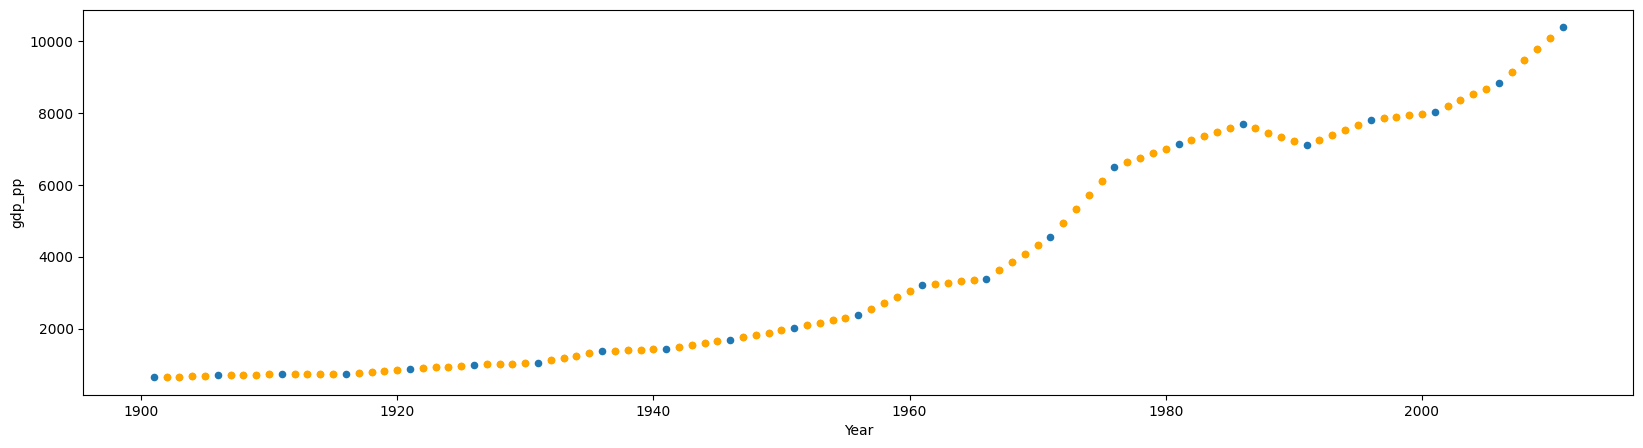

In [26]:
import matplotlib.pyplot as plt # Importando o lib de graficos.

# Cria uma figura (janela de plotagem) e um eixo (área de desenho do gráfico) usando o Matplotlib.
# A figura terá dimensões de 20 polegadas de largura por 5 polegadas de altura.
# Sendo dois objetos, onde fig é a figura (a janela ou tela em que seu gráfico será desenhado) e ax é o eixo (a área real onde o gráfico será plotado).
fig, ax = plt.subplots(figsize=(20, 5))

country = "Brazil"
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax) # pegando os dados Reais apenas do Brasil.

df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="orange") # Pegando os dados estimados do Brasil

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?